In [1]:
#importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier

import warnings 
warnings.filterwarnings('ignore')

In [2]:
print(('_')*120)
print('\t\t\t*********************DATASET:- Drugs Classification *********************\n\nDrug Classification:- The data set contains various information that effect the predictions like Age, Sex, BP, Cholesterol levels, Na to Potassium Ratio and finally the drug type. ')
print(('_')*120)

________________________________________________________________________________________________________________________
			*********************DATASET:- Drugs Classification *********************

Drug Classification:- The data set contains various information that effect the predictions like Age, Sex, BP, Cholesterol levels, Na to Potassium Ratio and finally the drug type. 
________________________________________________________________________________________________________________________


In [3]:
val=pd.read_csv('drug200.csv')

In [4]:
val

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [5]:
val.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [6]:
print(('_')*120)
print('\t\t\t\t*********************UNDERSTANDING OF GIVEN DATA*********************\n\n  The target feature is (Drug type) \n\nThe feature sets are: Age, Sex, Blood Pressure Levels(BP), Cholesterol Levels, Na to Potassium Ration ')
print(('_')*120)

________________________________________________________________________________________________________________________
				*********************UNDERSTANDING OF GIVEN DATA*********************

  The target feature is (Drug type) 

The feature sets are: Age, Sex, Blood Pressure Levels(BP), Cholesterol Levels, Na to Potassium Ration 
________________________________________________________________________________________________________________________


# Basic info of the Dataset 

In [7]:
print(('_')*120)
print('\t\t\t\t*********************ANALYSIS*********************\n\t\t\t\tMY DATABASE HAS 6 COLUMNS AND 200 ROWS.\n\t\t\t\tIT HAS 4 CATEGORICAL COLUMNS AND 2 NUMERICAL COLUMNS.')
print(('_')*120)
val.info()

________________________________________________________________________________________________________________________
				*********************ANALYSIS*********************
				MY DATABASE HAS 6 COLUMNS AND 200 ROWS.
				IT HAS 4 CATEGORICAL COLUMNS AND 2 NUMERICAL COLUMNS.
________________________________________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


# Analysis

### Q1 Which sex was addicted most by the drugs?

________________________________________________________________________________________________________________________
				**************ANALYSIS***************

		 Male were the most addicted with drugs
________________________________________________________________________________________________________________________


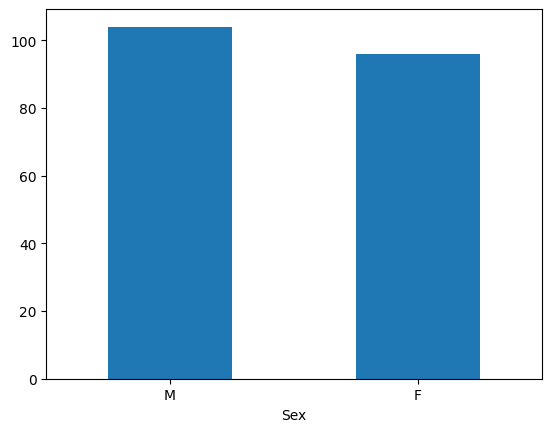

In [8]:
print(("_")*120)
print("\t\t\t\t**************ANALYSIS***************\n\n\t\t Male were the most addicted with drugs")
print(("_")*120)

x=(val['Sex'].unique())
y=(val['Drug'].value_counts())
val['Sex'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

### Q2 Distribution of Drug used?

________________________________________________________________________________________________________________________
				**************ANALYSIS***************

		 DrugY is used on al large scale
________________________________________________________________________________________________________________________


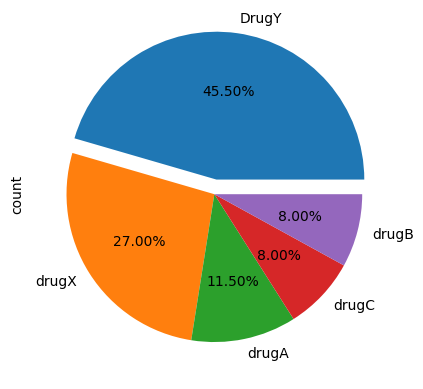

In [9]:
print(("_")*120)
print("\t\t\t\t**************ANALYSIS***************\n\n\t\t DrugY is used on al large scale")
print(("_")*120)
val['Drug'].value_counts().plot.pie(autopct='%1.2f%%',explode=(0.1,0,0,0,0))
plt.show()

# Q3 Addiction of drugs correlation to age

________________________________________________________________________________________________________________________
				**************ANALYSIS***************

				 People at age 70 consume most drugs
________________________________________________________________________________________________________________________


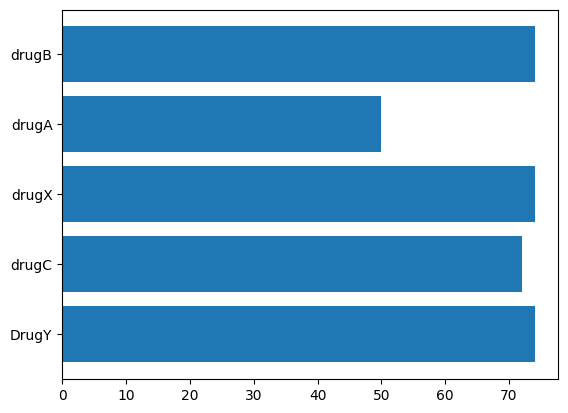

In [10]:
print(("_")*120)
print("\t\t\t\t**************ANALYSIS***************\n\n\t\t\t\t People at age 70 consume most drugs")
print(("_")*120)
x=val['Drug']
y=val['Age']
plt.barh(x,y)
plt.show()

# ML Project


## Outliers

________________________________________________________________________________________________________________________
				**************ANALYSIS***************

					 There are no Outliers
________________________________________________________________________________________________________________________


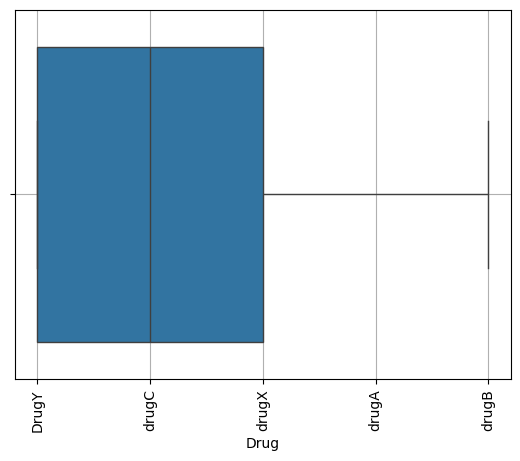

In [11]:
print(("_")*120)
print("\t\t\t\t**************ANALYSIS***************\n\n\t\t\t\t\t There are no Outliers")
print(("_")*120)
sns.boxplot(data= val, x= "Drug")
plt.xticks(rotation=90)

plt.grid()

In [12]:
val['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

## Spliting the data into x & y

In [13]:
x=val.drop(['Drug'], axis=1)
y=val['Drug']

## Encoding

In [14]:
encoder = OrdinalEncoder()
en = LabelEncoder()

In [15]:
x= encoder.fit_transform(x)
y=en.fit_transform(y)

In [16]:
y

array([0, 3, 3, 4, 0, 4, 0, 3, 0, 0, 3, 0, 0, 0, 4, 0, 4, 1, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 4, 2, 4, 0, 4, 4, 1, 4, 4, 4, 0, 2, 0, 4,
       4, 4, 1, 3, 0, 0, 0, 4, 0, 0, 2, 3, 2, 0, 4, 0, 0, 1, 0, 4, 2, 0,
       1, 4, 0, 0, 2, 0, 4, 0, 0, 0, 1, 0, 1, 4, 2, 4, 3, 1, 3, 2, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 1, 3, 4, 0, 4, 4, 0, 2, 0,
       1, 4, 4, 4, 4, 0, 4, 4, 1, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 4, 0, 0,
       4, 0, 0, 4, 2, 1, 2, 4, 1, 0, 2, 0, 1, 4, 4, 1, 4, 3, 1, 2, 4, 4,
       0, 3, 1, 0, 3, 4, 4, 2, 4, 0, 0, 0, 0, 4, 0, 1, 4, 4, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 4, 4, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 3, 0, 3, 3, 4,
       4, 4])

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(x)

StandardScaler()

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

## 1 - Predicting the data using Logistics Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logreg=LogisticRegression() 
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [23]:
print(("_")*120)
print("\t\t\t\t******************ANALYSIS******************\n\n\t\t\t\tWe have achieved an Average Accuracy of 94 % which is quite good \n\t\t\t\tLets see if we can increase this accuracy by hyper tuning ")
print(("_")*120)

from sklearn.metrics import classification_report 
cr=classification_report(ytest,ypred)
print(cr)

________________________________________________________________________________________________________________________
				******************ANALYSIS******************

				We have achieved an Average Accuracy of 94 % which is quite good 
				Lets see if we can increase this accuracy by hyper tuning 
________________________________________________________________________________________________________________________
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      0.75      0.86         4
           4       0.94      0.94      0.94        16

    accuracy                           0.94        50
   macro avg       0.97      0.93      0.94        50
weighted avg       0.94      0.94      0.94        50



### 1.1 - HPT using Solvers

### i - Liblinear

In [24]:
logreg=LogisticRegression(solver='liblinear')
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [25]:
print(("_")*120)
print("\t\t\t\t******************ANALYSIS*******************\n\n\t\t By using Liblinear we have achieved an Average Accuracy of 88 % which is still not good.\n\t\t It fell down from 94% ")
print(("_")*120)

cr=classification_report(ytest,ypred)
print(cr)

________________________________________________________________________________________________________________________
				******************ANALYSIS*******************

		 By using Liblinear we have achieved an Average Accuracy of 88 % which is still not good.
		 It fell down from 94% 
________________________________________________________________________________________________________________________
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.75      0.86         4
           2       0.71      1.00      0.83         5
           3       0.00      0.00      0.00         4
           4       0.88      0.94      0.91        16

    accuracy                           0.88        50
   macro avg       0.70      0.74      0.71        50
weighted avg       0.82      0.88      0.84        50



### ii - Saga

In [26]:
logreg=LogisticRegression(solver='saga')
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [27]:
print(("_")*120)
print("\t\t\t\t******************ANALYSIS******************\n\n\t\t\tBy using Saga we have achieved an Average Accuracy of 62 % which is not good at all.")
print(("_")*120)

cr=classification_report(ytest,ypred)
print(cr)

________________________________________________________________________________________________________________________
				******************ANALYSIS******************

			By using Saga we have achieved an Average Accuracy of 62 % which is not good at all.
________________________________________________________________________________________________________________________
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        21
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.53      0.62      0.57        16

    accuracy                           0.62        50
   macro avg       0.24      0.33      0.28        50
weighted avg       0.45      0.62      0.52        50



In [28]:
logreg=LogisticRegression(solver='sag')
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [29]:
print(("_")*120)
print("\t\t\t\t******************ANALYSIS******************\n\n\t\tBy using Sag we have achieved an Average Accuracy of 64 % which is still not good.")
print(("_")*120)

cr=classification_report(ytest,ypred)
print(cr)

________________________________________________________________________________________________________________________
				******************ANALYSIS******************

		By using Sag we have achieved an Average Accuracy of 64 % which is still not good.
________________________________________________________________________________________________________________________
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        21
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.55      0.69      0.61        16

    accuracy                           0.64        50
   macro avg       0.25      0.34      0.29        50
weighted avg       0.47      0.64      0.54        50



## 2 - Predicting the data using Decision Tree

In [30]:
dt=DecisionTreeClassifier()

In [31]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print(accuracy_score(ytest,ypred))
    print(classification_report(ytest,ypred))
    return model

In [32]:
print(("_")*120)
print("\t\t\t\t******************ANALYSIS******************\n\n\t\t\tBy using Decision Tree we get a accuracy of 98% which is good enough\n\t\tLets see if we can increase this accuracy by hyper tuning ")
print(("_")*120)

mymodel(dt)

________________________________________________________________________________________________________________________
				******************ANALYSIS******************

			By using Decision Tree we get a accuracy of 98% which is good enough
		Lets see if we can increase this accuracy by hyper tuning 
________________________________________________________________________________________________________________________
0.98
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       0.80      1.00      0.89         4
           4       1.00      1.00      1.00        16

    accuracy                           0.98        50
   macro avg       0.96      0.99      0.97        50
weighted avg       0.98      0.98      0.98        50



DecisionTreeClassifier()

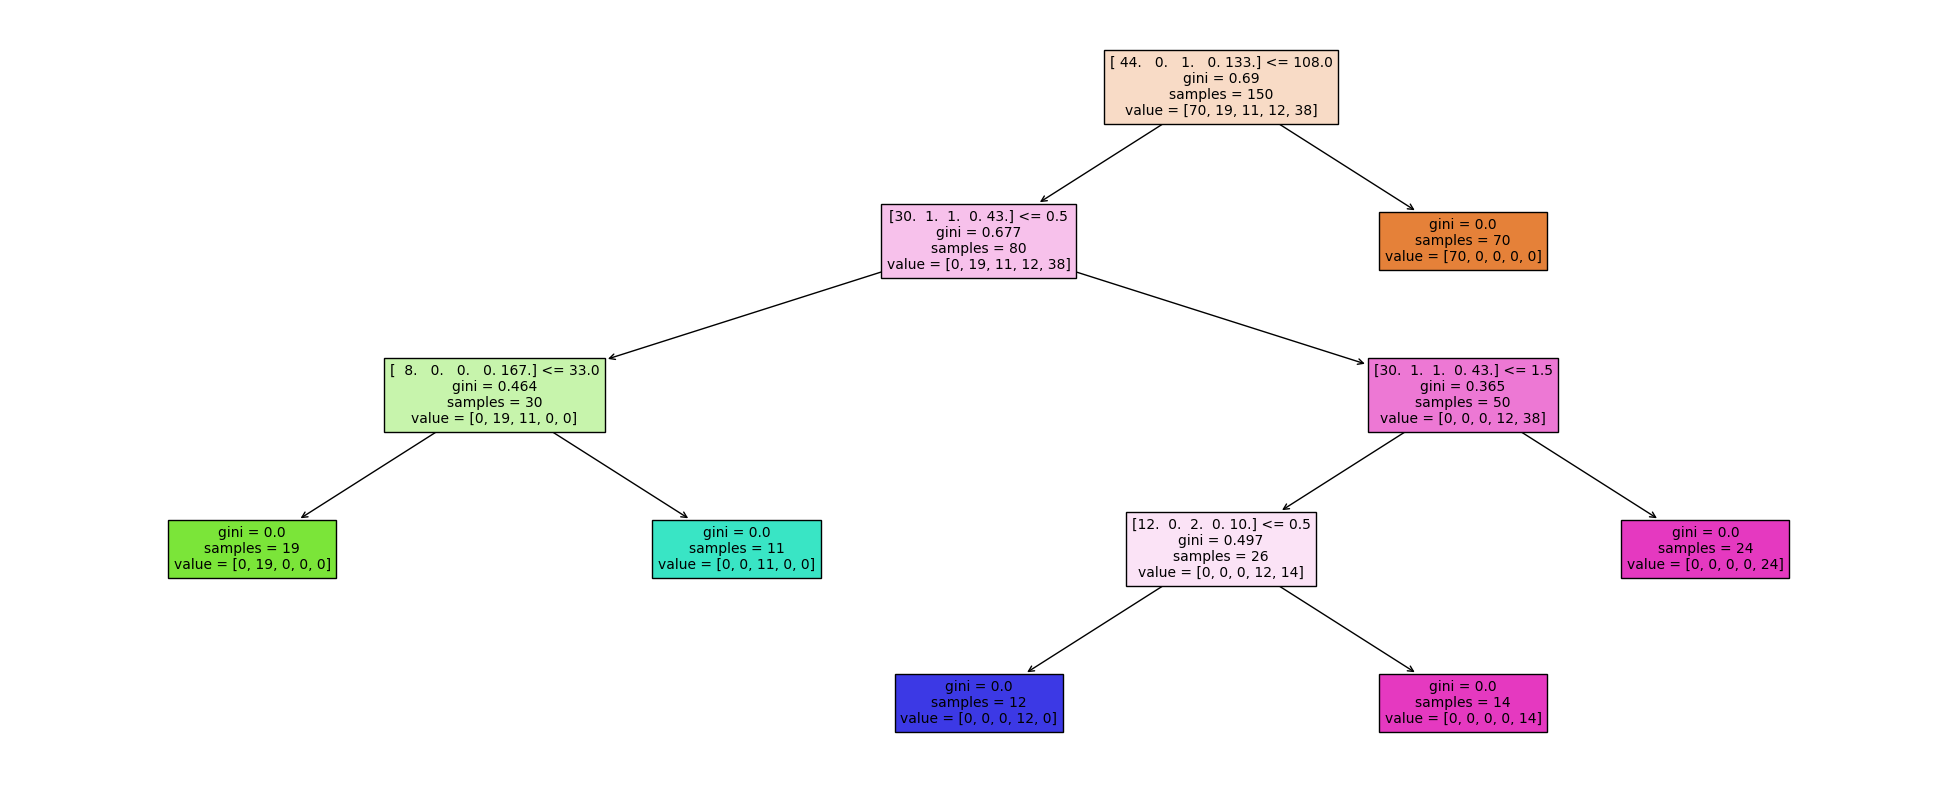

In [33]:
fig,ax=plt.subplots(figsize=(25,10))
chart=tree.plot_tree(dt,feature_names=x,filled=True,fontsize=10)
plt.savefig('Drug.jpg')

In [34]:
train = dt.score(xtrain,ytrain)
test = dt.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :1.0 
 test score : 0.98


#### train acc is high and test acc is low


#### low bias high varience

### 2.1 - HTP's of DecisionTree

### i - Max Depth

In [35]:
for i in range(1,10):
    dt1 = DecisionTreeClassifier(max_depth = i)
    dt1.fit(xtrain,ytrain)
    ypred = dt1.predict(xtest)
    ac = accuracy_score(ytest,ypred)
    print(f"max_depth = {i} accuracy : {ac}")

max_depth = 1 accuracy : 0.72
max_depth = 2 accuracy : 0.8
max_depth = 3 accuracy : 0.9
max_depth = 4 accuracy : 0.98
max_depth = 5 accuracy : 0.98
max_depth = 6 accuracy : 0.98
max_depth = 7 accuracy : 0.98
max_depth = 8 accuracy : 0.98
max_depth = 9 accuracy : 0.98


In [36]:
print(("_")*120)
print("\t\t\t\t******************ANALYSIS******************\n\n\t\t\tBy using Max Depth we get a accuracy of 80% which is not good enough. \n\t\t\t as it Dropped down from 98%")
print(("_")*120)

dt2 = DecisionTreeClassifier(max_depth = 2)
mymodel(dt2)

________________________________________________________________________________________________________________________
				******************ANALYSIS******************

			By using Max Depth we get a accuracy of 80% which is not good enough. 
			 as it Dropped down from 98%
________________________________________________________________________________________________________________________
0.8
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.44      1.00      0.62         4
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.76      1.00      0.86        16

    accuracy                           0.80        50
   macro avg       0.44      0.59      0.49        50
weighted avg       0.70      0.80      0.74        50



DecisionTreeClassifier(max_depth=2)

In [37]:
train = dt2.score(xtrain,ytrain)
test = dt2.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :0.8466666666666667 
 test score : 0.8


### ii - min_sample_split

In [38]:
for i in range(2,110):
    dt3 = DecisionTreeClassifier(min_samples_split = i)
    dt3.fit(xtrain,ytrain)
    ypred = dt3.predict(xtest)
    ac = accuracy_score(ytest,ypred)
    print(f"max_depth = {i} accuracy : {ac}")

max_depth = 2 accuracy : 0.98
max_depth = 3 accuracy : 0.98
max_depth = 4 accuracy : 0.98
max_depth = 5 accuracy : 0.98
max_depth = 6 accuracy : 0.98
max_depth = 7 accuracy : 0.98
max_depth = 8 accuracy : 0.98
max_depth = 9 accuracy : 0.98
max_depth = 10 accuracy : 0.98
max_depth = 11 accuracy : 0.98
max_depth = 12 accuracy : 0.98
max_depth = 13 accuracy : 0.98
max_depth = 14 accuracy : 0.98
max_depth = 15 accuracy : 0.98
max_depth = 16 accuracy : 0.98
max_depth = 17 accuracy : 0.98
max_depth = 18 accuracy : 0.98
max_depth = 19 accuracy : 0.98
max_depth = 20 accuracy : 0.98
max_depth = 21 accuracy : 0.98
max_depth = 22 accuracy : 0.98
max_depth = 23 accuracy : 0.98
max_depth = 24 accuracy : 0.98
max_depth = 25 accuracy : 0.98
max_depth = 26 accuracy : 0.98
max_depth = 27 accuracy : 0.9
max_depth = 28 accuracy : 0.9
max_depth = 29 accuracy : 0.9
max_depth = 30 accuracy : 0.9
max_depth = 31 accuracy : 0.8
max_depth = 32 accuracy : 0.8
max_depth = 33 accuracy : 0.8
max_depth = 34 accuracy

In [39]:
print(("_")*120)
print("\t\t\t\t******************ANALYSIS******************\n\n\t\t\tBy using Min_Sample_Split we get a accuracy of 90% which is not good enough")
print(("_")*120)

dt4 = DecisionTreeClassifier(min_samples_split = 27)
mymodel(dt4)

________________________________________________________________________________________________________________________
				******************ANALYSIS******************

			By using Min_Sample_Split we get a accuracy of 90% which is not good enough
________________________________________________________________________________________________________________________
0.9
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         4
           4       0.76      1.00      0.86        16

    accuracy                           0.90        50
   macro avg       0.75      0.79      0.77        50
weighted avg       0.84      0.90      0.87        50



DecisionTreeClassifier(min_samples_split=27)

In [40]:
train = dt4.score(xtrain,ytrain)
test = dt4.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :0.92 
 test score : 0.9


### iii - min_samples_leaf

In [41]:

for i in range(30,50):
    dt5 = DecisionTreeClassifier(min_samples_leaf = i)
    dt5.fit(xtrain,ytrain)
    ypred = dt5.predict(xtest)
    ac = accuracy_score(ytest,ypred)
    print(f"max_depth = {i} accuracy : {ac}")

max_depth = 30 accuracy : 0.8
max_depth = 31 accuracy : 0.72
max_depth = 32 accuracy : 0.72
max_depth = 33 accuracy : 0.72
max_depth = 34 accuracy : 0.72
max_depth = 35 accuracy : 0.72
max_depth = 36 accuracy : 0.72
max_depth = 37 accuracy : 0.72
max_depth = 38 accuracy : 0.72
max_depth = 39 accuracy : 0.72
max_depth = 40 accuracy : 0.72
max_depth = 41 accuracy : 0.72
max_depth = 42 accuracy : 0.72
max_depth = 43 accuracy : 0.72
max_depth = 44 accuracy : 0.72
max_depth = 45 accuracy : 0.72
max_depth = 46 accuracy : 0.72
max_depth = 47 accuracy : 0.72
max_depth = 48 accuracy : 0.72
max_depth = 49 accuracy : 0.72


In [42]:
print(("_")*120)
print("\t\t\t\t******************ANALYSIS******************\n\n\t\t\tBy using Min_Sample_leaf we get a accuracy of 72% which is not good enough")
print(("_")*120)
dt6 = DecisionTreeClassifier(min_samples_leaf = 31)
mymodel(dt6)

________________________________________________________________________________________________________________________
				******************ANALYSIS******************

			By using Min_Sample_leaf we get a accuracy of 72% which is not good enough
________________________________________________________________________________________________________________________
0.72
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.53      1.00      0.70        16

    accuracy                           0.72        50
   macro avg       0.31      0.39      0.33        50
weighted avg       0.59      0.72      0.63        50



DecisionTreeClassifier(min_samples_leaf=31)

In [43]:
train = dt6.score(xtrain,ytrain)
test = dt6.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :0.72 
 test score : 0.72


### 4 - Predicting the data using Random Forest

In [44]:
print(("_")*120)
print("\t\t\t\t******************ANALYSIS******************\n\n\t\t\t\tBy using Random Forest we get accuracy of 98% again that's good enough.")
print(("_")*120)
rc = RandomForestClassifier()
rc.fit(xtrain,ytrain)
ypred = rc.predict(xtest)
print(classification_report(ytest,ypred))

________________________________________________________________________________________________________________________
				******************ANALYSIS******************

				By using Random Forest we get accuracy of 98% again that's good enough.
________________________________________________________________________________________________________________________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      0.75      0.86         4
           4       0.94      1.00      0.97        16

    accuracy                           0.98        50
   macro avg       0.99      0.95      0.97        50
weighted avg       0.98      0.98      0.98        50



### 5 - Predicting the data using Boosting

### i - Adaboost Classifier

In [45]:
print(("_")*120)
print("\t\t\t\t******************ANALYSIS******************\n\n\t\t\tBy using ADA Boost we get accuracy of 80% again that's not good enough.\n\t\t\t as it fell down from 98% again")
print(("_")*120)
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(xtrain,ytrain)
ypred = ada.predict(xtest)
print(classification_report(ytest,ypred))

________________________________________________________________________________________________________________________
				******************ANALYSIS******************

			By using ADA Boost we get accuracy of 80% again that's not good enough.
			 as it fell down from 98% again
________________________________________________________________________________________________________________________
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.44      1.00      0.62         4
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.76      1.00      0.86        16

    accuracy                           0.80        50
   macro avg       0.44      0.59      0.49        50
weighted avg       0.70      0.80      0.74        50



### ii - Gradient Boosting

In [46]:
print(("_")*120)
print("\t\t\t\t******************ANALYSIS******************\n\n\t\t\t\tBy using Gradient Boosting we get accuracy of 98% again that's good enough.")
print(("_")*120)
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)
ypred = gbc.predict(xtest)
print(classification_report(ytest,ypred))

________________________________________________________________________________________________________________________
				******************ANALYSIS******************

				By using Gradient Boosting we get accuracy of 98% again that's good enough.
________________________________________________________________________________________________________________________
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       0.80      1.00      0.89         4
           4       1.00      1.00      1.00        16

    accuracy                           0.98        50
   macro avg       0.96      0.99      0.97        50
weighted avg       0.98      0.98      0.98        50



### iii - XG Boosting

In [47]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [48]:
print(("_")*120)
print("\t\t\t\t******************ANALYSIS******************\n\n\t\t\t\tBy using XG Boosting we get accuracy of 98% again that's good enough.")
print(("_")*120)
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(xtrain,ytrain)
ypred = xgb.predict(xtest)
print(classification_report(ytest,ypred))

________________________________________________________________________________________________________________________
				******************ANALYSIS******************

				By using XG Boosting we get accuracy of 98% again that's good enough.
________________________________________________________________________________________________________________________
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       0.80      1.00      0.89         4
           4       1.00      1.00      1.00        16

    accuracy                           0.98        50
   macro avg       0.96      0.99      0.97        50
weighted avg       0.98      0.98      0.98        50



### 6. Predicting the data using Encemble Learning

### i - Bagging

In [49]:
print(("_")*120)
print("\t\t\t\t******************ANALYSIS******************\n\n\t\t\tBy using Bagging(Logistic Regression) we get accuracy of 88% again that's not good enough.")
print(("_")*120)
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(LogisticRegression())
bg.fit(xtrain,ytrain)
ypred = bg.predict(xtest)
print(classification_report(ytest,ypred))

________________________________________________________________________________________________________________________
				******************ANALYSIS******************

			By using Bagging(Logistic Regression) we get accuracy of 88% again that's not good enough.
________________________________________________________________________________________________________________________
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.75      0.86         4
           2       0.62      1.00      0.77         5
           3       0.00      0.00      0.00         4
           4       0.94      0.94      0.94        16

    accuracy                           0.88        50
   macro avg       0.70      0.74      0.70        50
weighted avg       0.83      0.88      0.85        50



In [50]:
print(("_")*120)
print("\t\t\t\t******************ANALYSIS******************\n\n\t\t\t\tBy using Bagging(DecisionTreeClassifier) we get accuracy of 96% again that's good enough.")
print(("_")*120)
bg = BaggingClassifier(DecisionTreeClassifier())
bg.fit(xtrain,ytrain)
ypred = bg.predict(xtest)
print(classification_report(ytest,ypred))

________________________________________________________________________________________________________________________
				******************ANALYSIS******************

				By using Bagging(DecisionTreeClassifier) we get accuracy of 96% again that's good enough.
________________________________________________________________________________________________________________________
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       0.80      1.00      0.89         4
           4       1.00      1.00      1.00        16

    accuracy                           0.98        50
   macro avg       0.96      0.99      0.97        50
weighted avg       0.98      0.98      0.98        50



In [51]:
models =[]
models.append(("lr",LogisticRegression()))
models.append(("dt",DecisionTreeClassifier()))

### ii) Voting Classifer

In [52]:
print(("_")*120)
print("\t\t\t\t******************ANALYSIS******************\n\n\t\t\t\tBy using Voting Classifier(hard) we get accuracy of 96% that's quite good enough.")
print(("_")*120)
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators = models) # estimators --> model name
vc.fit(xtrain,ytrain)
ypred = vc.predict(xtest)
print(classification_report(ytest,ypred))

________________________________________________________________________________________________________________________
				******************ANALYSIS******************

				By using Voting Classifier(hard) we get accuracy of 96% that's quite good enough.
________________________________________________________________________________________________________________________
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      0.75      0.86         4
           4       1.00      0.94      0.97        16

    accuracy                           0.96        50
   macro avg       0.98      0.94      0.96        50
weighted avg       0.96      0.96      0.96        50



In [53]:
print(("_")*120)
print("\t\t\t\t******************ANALYSIS******************\n\n\t\t\t\tBy using Voting Classifier(soft) we get accuracy of 98% that's good enough.")
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators = models,voting='soft') 
vc.fit(xtrain,ytrain)
ypred = vc.predict(xtest)
print(classification_report(ytest,ypred))

________________________________________________________________________________________________________________________
				******************ANALYSIS******************

				By using Voting Classifier(soft) we get accuracy of 98% that's good enough.
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       0.80      1.00      0.89         4
           4       1.00      1.00      1.00        16

    accuracy                           0.98        50
   macro avg       0.96      0.99      0.97        50
weighted avg       0.98      0.98      0.98        50



# Conclusion